# Intro

The enphasis of the last notebook was on the accuracy of Horn's algorithm. We analyzed the iris and crab datasets, and also a mixture of gaussians.

Now the method's performance will be analysed. Currently the gradient descent implementation (port of the original code provided by ([Horn](http://horn.tau.ac.il/QC.htm)) is quite simple and the only stopping criteria is the number of iterations. Future work will involve implementing a more complete gradient descent, but for now we'll use the number of iterations to test it's performance.

Since we're only testing performance, accuracy is not of essence so we'll use only artificial data where it's easy to scale diminsionality and cardinality and see it's effect on the performance. Furthermore, raw data will be input to the algorithm instead of the PCA representation, Also, while the true algorithm is only the convergence part, we'll also time the assignment for each test case.

# Tests

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn
from sklearn import preprocessing,decomposition,datasets
import seaborn as sns

In [13]:
%cd /home/chiroptera/workspace/QCThesis/MyML/cluster/
import Horn as HornAlg
reload(HornAlg)

/home/chiroptera/workspace/QCThesis/MyML/cluster


<module 'Horn' from 'Horn.pyc'>

In [14]:
import MyML.metrics.accuracy as determine_ci
reload(determine_ci)

<module 'MyML.metrics.accuracy' from '/home/chiroptera/workspace/QCThesis/MyML/metrics/accuracy.pyc'>

In [15]:
# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

We'll use a random sigma and fixed number of steps of 200 for all runs.

In [16]:
n_magnitude=[1,2,3,4] #10^n_magniture data_points
n_features=[2,3,4,5]
centers=4

steps=200
sigma=np.random.rand()
minD=2

In [17]:
timings_clust=np.zeros((len(n_magnitude),len(n_features)))
timings_assign=np.zeros((len(n_magnitude),len(n_features)))

for i,mag in enumerate(n_magnitude):
    n_samples=10**mag
    for j,dim in enumerate(n_features):
        print "\nGenerating dataset with ",n_samples, " samples, ",dim, " features."
        x_Gauss,x_assign=sklearn.datasets.make_blobs(n_samples=n_samples,n_features=dim,centers=centers)
        print "Clustering..."
        gaussD,V,E,hello=HornAlg.graddesc(x_Gauss,sigma=sigma,steps=steps,timeit=True)
        print "Took ",hello," seconds"
        timings_clust[i,j]=hello
        
        print "Assigning..."
        assignment,hello=HornAlg.fineCluster(gaussD,dist,potential=V,timeit=True)
        timings_assign[i,j]=hello
        print "Took ",hello," seconds"


Generating dataset with  10  samples,  2  features.
Clustering...
Took  0.2438  seconds
Assigning...
Took  0.016698  seconds

Generating dataset with  10  samples,  3  features.
Clustering...
Took  0.272507  seconds
Assigning...
Took  0.000235  seconds

Generating dataset with  10  samples,  4  features.
Clustering...
Took  0.279148  seconds
Assigning...
Took  0.000234  seconds

Generating dataset with  10  samples,  5  features.
Clustering...
Took  0.302654  seconds
Assigning...
Took  0.000232  seconds

Generating dataset with  100  samples,  2  features.
Clustering...
Took  2.329284  seconds
Assigning...
Took  0.000954  seconds

Generating dataset with  100  samples,  3  features.
Clustering...
Took  2.558733  seconds
Assigning...
Took  0.000959  seconds

Generating dataset with  100  samples,  4  features.
Clustering...
Took  2.826178  seconds
Assigning...
Took  0.000502  seconds

Generating dataset with  100  samples,  5  features.
Clustering...
Took  3.065772  seconds
Assigning..

KeyboardInterrupt: 

In [7]:
clust=array([[  3.53820000e-01,   4.11391000e-01,   3.85114000e-01,
          4.29747000e-01],
       [  2.95465000e+00,   3.32259300e+00,   3.74372000e+00,
          4.14382300e+00],
       [  5.28406660e+01,   6.02932620e+01,   6.82256710e+01,
          8.15232120e+01],
       [  3.00967826e+03,   3.41834283e+03,   3.95628906e+03,
          4.91818584e+03]])
assign=array([[  1.59000000e-04,   1.58000000e-04,   1.56000000e-04,
          1.57000000e-04],
       [  5.19000000e-04,   5.06000000e-04,   5.21000000e-04,
          5.16000000e-04],
       [  7.67200000e-03,   8.27300000e-03,   7.77000000e-03,
          8.07000000e-03],
       [  3.95657000e-01,   4.00728000e-01,   4.00611000e-01,
          4.26076000e-01]])

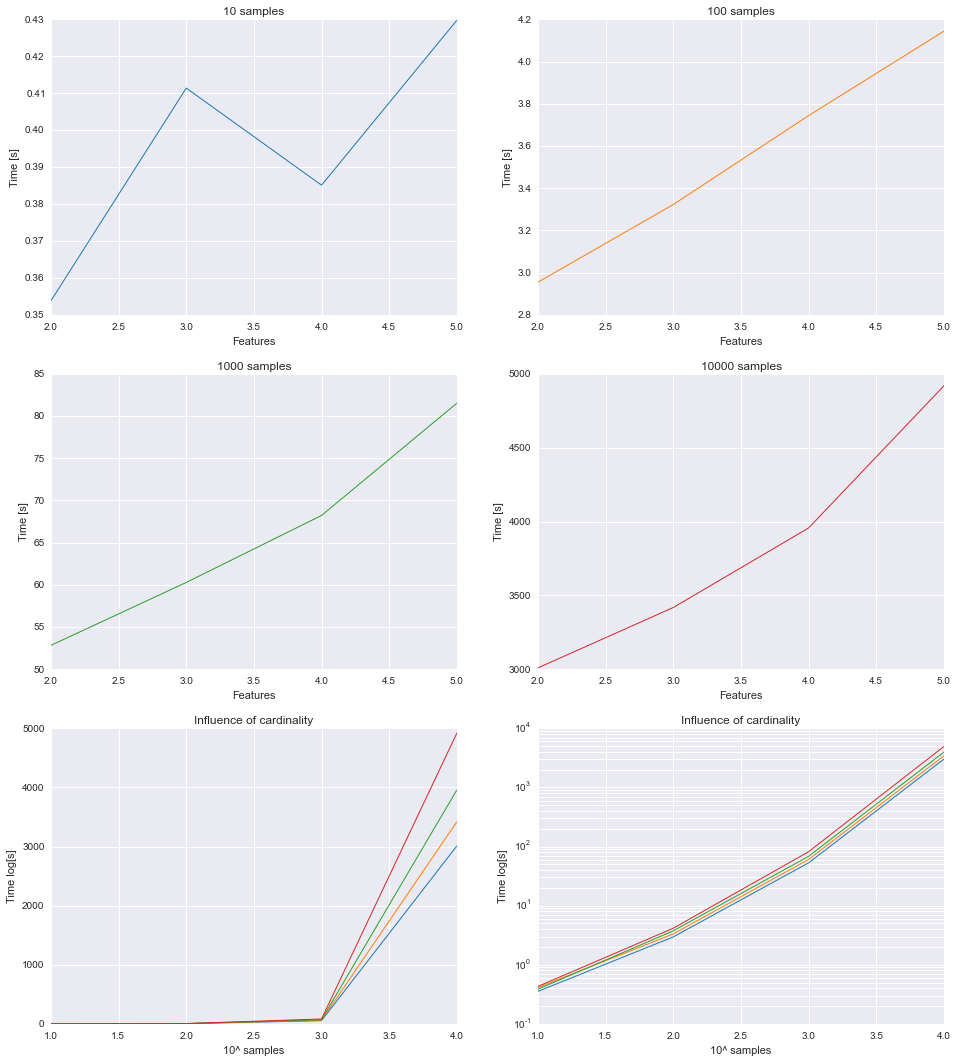

In [59]:
fig = pyplot.figure(figsize=(16,18))

for i in range(4):
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title(str(10**n_magnitude[i]) + ' samples')
    ax.set_xlabel('Features')
    ax.set_ylabel('Time [s]')
    
    line, = ax.plot(n_features,clust[i], color=tableau20[i*2], lw=1)
    ax.set_yscale('linear')

ax = fig.add_subplot(3,2,5)
ax.set_title('Influence of cardinality')
ax.set_xlabel('10^ samples')
ax.set_ylabel('Time log[s]')
for i in range(4):
    line, = ax.plot(n_magnitude,clust[:,i], color=tableau20[i*2], lw=1,label=str(n_features[i])+' features')
ax.set_yscale('linear')

ax = fig.add_subplot(3,2,6)
ax.set_title('Influence of cardinality')
ax.set_xlabel('10^ samples')
ax.set_ylabel('Time log[s]')
for i in range(4):
    line, = ax.plot(n_magnitude,clust[:,i], color=tableau20[i*2], lw=1,label=str(n_features[i])+' features')
ax.set_yscale('log')

In [53]:
feature_inc=np.zeros((4,3))
for i in range(1,4):
    feature_inc[:,i-1]=clust[:,i]/clust[:,i-1]
    
sample_inc=np.zeros((3,4))
for i in range(1,4):
    sample_inc[i-1,:]=clust[i,:]/clust[i-1,:]

In [56]:
import pandas as pd

In [85]:
feature_inc_pd=pd.DataFrame(feature_inc)
sample_inc_pd=pd.DataFrame(sample_inc)

print '\n','feature evolution (read right)','\n',feature_inc_pd
print '\n','sample evolution (read down)','\n',sample_inc_pd


feature evolution (read right) 
          0         1         2
0  1.162713  0.936126  1.115896
1  1.124530  1.126746  1.106873
2  1.141039  1.131564  1.194905
3  1.135783  1.157370  1.243131

sample evolution (read down) 
           0          1          2          3
0   8.350715   8.076484   9.721070   9.642471
1  17.883900  18.146448  18.224031  19.673430
2  56.957614  56.695271  57.988276  60.328656
